# Лабораторная работа 3: Решение нелинейных уравнений


# Часть 1. Одномерный случай


Будем исследовать уравнение ***12.3е)***:

$ f(x) = x^2 - 20 sin(x) = 0$

Для начала, рассмотрим график функции и локализуем корни.

## 1.0 Локализация корней

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [2]:
def task_func(x):
    return x**2 - 20*np.sin(x)

def task_func_derivative(x):
    return 2*x - 20*np.cos(x)

def task_func_derivative2(x):
    return 2 + 20*np.sin(x)

def plot_func(func, limits):
    X = np.linspace(*limits, 1024)
    Y = func(X)

    plt.plot(X, Y)
    plt.grid()
    plt.title("График функции")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.hlines(0, *limits, colors="k", linestyles="dashed")
    plt.show()

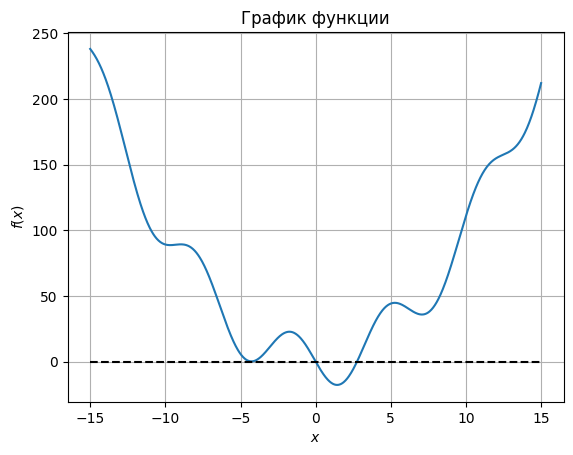

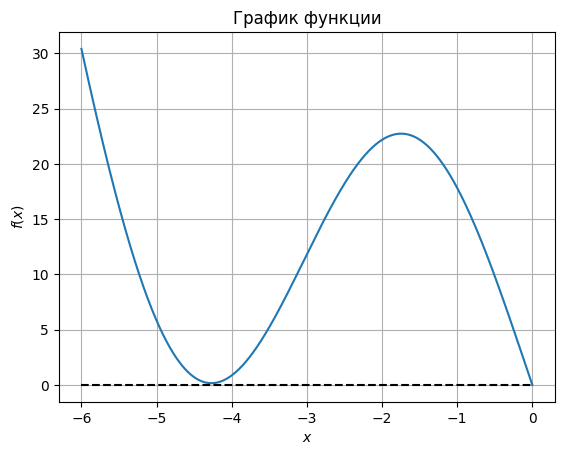

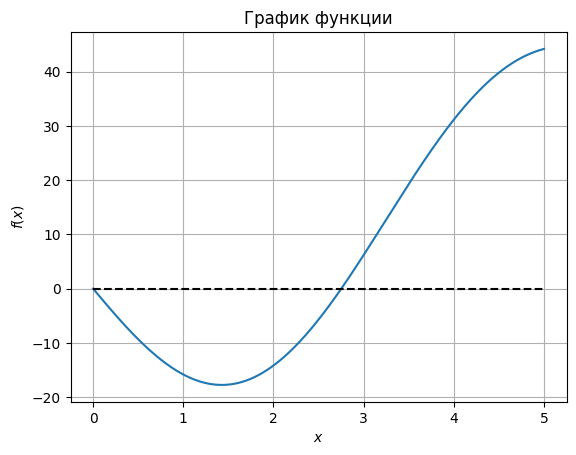

In [3]:
plot_func(task_func, (-15, 15))
plot_func(task_func, (-6, 0))
plot_func(task_func, (0, 5))


Имеем 3 кандитатов. Один из них, очевидно, - $x_0 = 0$. Остальные два корня будем уточнять.

$x_1 \in (-5, -4) \\ x_2 \in (2, 3)$

При этом, можно заметить, что $x_1$ не является корнем, но мы все же потом это честно проверим:

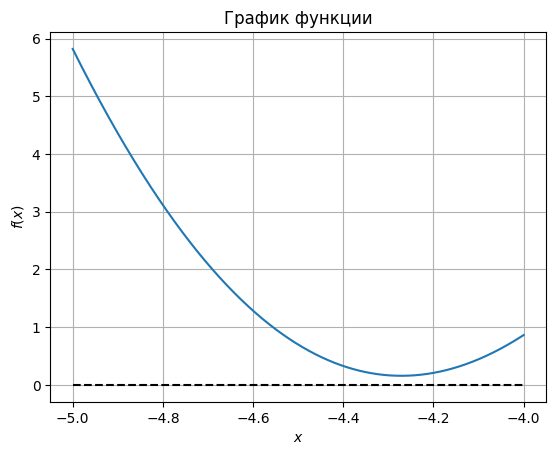

In [4]:
plot_func(task_func, (-5, -4))

In [5]:
band1 = (-5, -4)
band2 = (2, 3)

Сразу сделаем функцию для валидации найденных корней

In [6]:
FIT_TOLERANCE = 1e-3
MAXIMUM_STEPS = 10**6

def validate(func, x):
    if abs(func(x)) > FIT_TOLERANCE:
        raise RuntimeError(f"Error: not a root,\n"
                           f"x    = {x}\n"
                           f"f(x) = {func(x)}")
    return x

## 1.1 Метод простой итерации

Построим МПИ для корня $x_2 \in (2, 3)$:

$x^2 - 20sin(x) = 0$

$x_{k+1} = f(x) = (20 x_k^3 sin(x_k))^{1/5}$

In [7]:
# Тут небольшие приседания со знаками
# Делаем так, чтобы питон нормально воспринимал
# отрицательные числа под корнем нечетной степени

def SIM_func(x):
    val = 20 * x**3 * np.sin(x)
    return np.sign(val) * (np.abs(val))**(1/5)

In [8]:
def SIM(func, band):
    x = np.random.uniform(*band)
    for _ in range(MAXIMUM_STEPS):
        #print(f"{x} -> {func(x)}")
        if np.abs(x - func(x)) < FIT_TOLERANCE/100:
            return x
        x = func(x)
        
    raise RuntimeError("Reached max step count")
        

In [9]:
print(f"Root 1: {validate(task_func, SIM(SIM_func, band2))}")

Root 1: 2.752941239545509


Таким образом, $x_2 \approx 2.75$ является корнем.

Для того, чтобы доказать, что $x_1 \in (-5, -4)$ не является корнем, найдем точку минимума нашей функции:

$g'(x) = 2x - 20cos(x) = 0$

Построим МПИ:

$x_{k+1} = f(x_k) = (10 x_k^6 cos(x_k))^{1/7}$

In [10]:
def SIM_func_derivative(x):
    val = 10 * x**6 * np.cos(x)
    return np.sign(val) * (np.abs(val))**(1/7)

In [11]:
extr = SIM(SIM_func_derivative, band1)
print(f"Extremum: {extr}")
print(f"f(x) = {task_func(extr)}")

Extremum: -4.271102155888534
f(x) = 0.15825752729863396


Таким образом, в точке минимума $f(x_1) \approx 0.16$, значит, точка $x_1 \approx -4.27$ не является нулем.

## 1.2 Метод Ньютона

Построим метод Ньютона:

$F(x) = x^2 - 20sin(x)$

$F'(x) = 2x - 20cos(x)$

$x_{k+1} = x_k - F(x_k)/F'(x_k)$

> **Комментарий:** в одномерном случае производную я посчитал аналитически. <br>
В многомерном случае буду пользоваться численным методом, чтобы не считать якобиан ручками

In [12]:
def newton(func, deriv, band):
    x = np.random.uniform(*band)
    for _ in range(MAXIMUM_STEPS):
        #print(f"{x} - {func(x)}")
        if np.abs(func(x)) < FIT_TOLERANCE/100:
            return x
        x -= func(x)/deriv(x)
        
    raise RuntimeError("Reached max step count")    

In [13]:
print(f"Root 1: {validate(task_func, newton(task_func, task_func_derivative, band2))}")

Root 1: 2.7529466338283513


Опять же, $x_2 \approx 2.75$ является корнем.
Повторим те же процедуры для $x_1$, что и в МПИ.
Построим метод Ньютона для производной:

$F'(x) = 2x - 20cos(x)$

$F''(x) = 2 + 20sin(x)$

$x_{k+1} = x_k - F'(x_k)/F''(x_k)$


In [14]:
extr = newton(task_func_derivative, task_func_derivative2, band1)
print(f"Extremum: {extr}")
print(f"f(x) = {task_func(extr)}")

Extremum: -4.271095495789353
f(x) = 0.15825752683204541


Опять же, точка $x_1 \approx -4.27$ не является корнем исходного уравнения.

## 1.3 Результаты

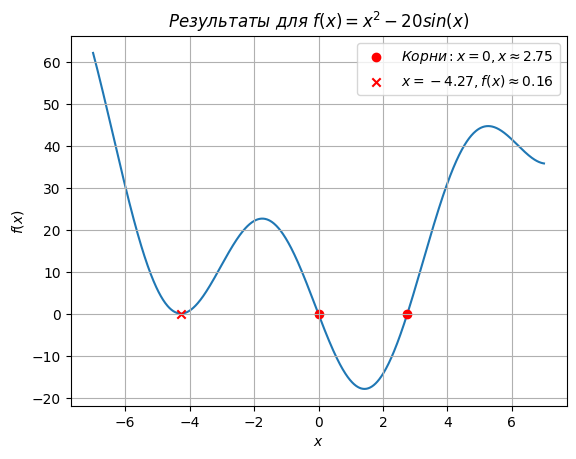

In [15]:
band = np.linspace(-7, 7, 1000)
plt.plot(band, task_func(band), zorder = 0)
plt.grid()
plt.scatter([0, 2.75], [0, 0], marker="o", c="r", label="$Корни: x=0, x \\approx 2.75$")
plt.scatter([-4.27], [0], marker="x", c="r", label="$x = -4.27, f(x) \\approx 0.16$")
plt.legend()
plt.title("$Результаты ~для~ f(x) = x^2 - 20sin(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

# Часть 2: Многомерный случай

Возьмем систему ***12.6б)***:

$ (x - 1.4)^2 - (y - 0.6)^2 = 1$

$ 4.2x^2 + 8.8y^2 = 1.42$

In [16]:
def task_f0(X):
    x, y = X
    return (x - 1.4)**2 - (y - 0.6)**2 - 1

def task_f1(X):
    x, y = X
    return 4.2 * x**2 + 8.8 * y**2 - 1.42

task_f = [task_f0, task_f1]

def apply(func, X):
    ret = np.empty_like(X)
    for i in range(len(X)):
        ret[i] = func[i](X)
    return ret

def validate(func, X):
    if np.linalg.norm(apply(func, X)) > FIT_TOLERANCE:
        raise RuntimeError(f"Error: not a solution\n"
                           f"X = {X},\n"
                           f"F(X) = {func(X)}")
    
    return X

## 2.0 Локализация точек пересечения

Перепишем уравнения в параметрическом виде:

$x = 1.4 - ch(t), ~y = 0.6 + sh(t)$

$x = \sqrt{\frac{1.42}{4.2}} cos (\varphi), ~y = \sqrt{\frac{1.42}{8.8}} sin (\varphi)$

> Комментарий: я пропустил кривую, в которой $x = 1.4 + ch (t)$, поскольку она не пересекается с эллипсом

Теперь мы можем построить кривые:

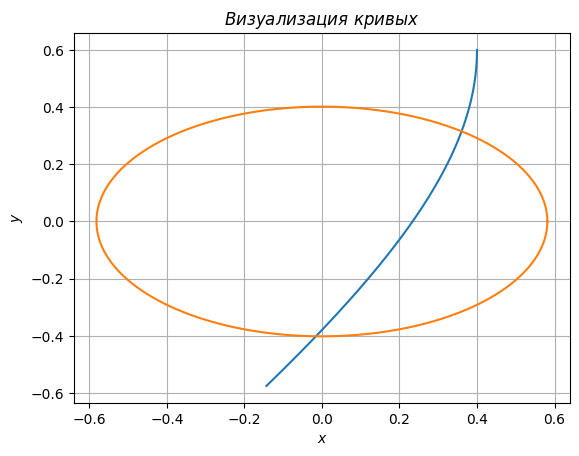

In [17]:
def curve1():
    t = np.linspace(-1, 0, 1000)
    return ((1.4 - np.cosh(t)), (0.6 + np.sinh(t)))

def curve2():
    phi = np.linspace(0, 2*np.pi, 1000)

    cx = np.sqrt(1.42 / 4.2)
    cy = np.sqrt(1.42 / 8.8)

    return (cx * np.cos(phi), cy * np.sin(phi))

plt.plot(*curve1())
plt.plot(*curve2())
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$Визуализация ~кривых$")
plt.show()


Имеем 2 области, в которых будем искать точку пересечения:

$\Pi_1 = (0.2, 0.4) \times (0.2, 0.4)$

$\Pi_2 = (-0.1, 0) \times (-0.1, 0.1)$

In [18]:
band1 = np.array([[0.2, 0.4], [0.2, 0.4]])
band2 = np.array([[-0.1, 0], [-0.1, 0.1]])

## 2.1 Метод простой итерации

Сконструируем МПИ:

$x = {\bf f}_0(x, y) = 1.4 + ((x - 1.4)^3(1 + (y-0.6)^2))^{1/5}$

$y = {\bf f}_1(x, y) = (\frac{y^3}{8.8}(1.42 - 4.2x^2))^{1/5}$

$X_{k+1} = {\bf f}(X_k)$

In [19]:
def task_smi_f(X):
    x, y = X

    newx = (x - 1.4)**3 * (1 + (y - 0.6)**2)
    newx = np.sign(newx) * np.abs(newx)**(1/5)
    newx += 1.4

    newy = y**3 * (1.42 - 4.2 * x**2) / 8.8
    newy = np.sign(newy) * np.abs(newy)**(1/5)

    return np.array([newx, newy])

In [20]:
def SMI(func, band, X0 = None):
    if X0 is None:
        x0 = np.random.uniform(*band[0])
        y0 = np.random.uniform(*band[1])
        X0 = np.array([x0, y0])

    X = X0

    for _ in range(MAXIMUM_STEPS):
        if np.linalg.norm(X - func(X)) < FIT_TOLERANCE/100:
            return X
        X = func(X)

    raise RuntimeError("Reached max step count")

In [21]:
print(f"Point1: {validate(task_f, SMI(task_smi_f, band1))}")

# Тут явно указываем начальную точку
# При случайных начальных условиях решение иногда
# сходится к предыдущей точке
print(f"Point2: {validate(task_f, SMI(task_smi_f, band2, [-0.5, -0.5]))}")

Point1: [0.36 0.32]
Point2: [-0.02 -0.4 ]


Итого, получили две точки пересечения:

$X_1 = (0.36, 0.32)$

$X_2 = (-0.02, -0.4)$


## 2.2 Метод Ньютона

Итерация выглядит следующим образом:

$X_{k+1} = X_{k} - J^{-1}F(X_k)$

Якобиан получаем численным частным дифференцированием. Перепишем уравнение в другом виде:

$J(X_{k+1} - X_{k}) = -F(X_k)$

Обозначив $\Delta X = X_{k+1} - X_{k}$, мы сведем задачу к решению системы относительно $\Delta X$

$J \Delta X = -F(X_k)$

Откуда будем получать последующее значение

$X_{k + 1} = X_k + \Delta X $

> Функция решения СЛАУ взята из предыдущей лабы

In [22]:
DERIV_H = 1e-4

def partial_derivative(func, i, X):
    dX = np.zeros_like(X)
    dX[i] = DERIV_H
    return (func(X + dX) - func(X - dX)) / (2 * DERIV_H)

def jacob(func, X):
    N = len(X)
    J = np.zeros([N, N])

    for i in range(N):
        for j in range(N):
            J[i][j] = partial_derivative(func[i], j, X)
    
    return J

def get_any(s: set):
    elt = None
    for e in s:
        elt = e
        break
    return elt

# Решение СЛАУ методом Гаусса из прошлой лабы
def gauss(A: np.ndarray, b: np.ndarray, do_print=False):
    dims = len(b)
    A = np.concatenate((A, np.array([b]).T), axis=1)

    if do_print: print("Исходная матрица: \n", A, "\n")

    # Forward
    if do_print: print("Прямой ход: ")
    
    indices = set(range(dims))
    sequence = []
    i_max = None

    for n in range(dims-1):
        i_max = get_any(indices)
        for i in indices:
            if (abs(A[i][n]) > abs(A[i_max][n])):
                i_max = i

        if (abs(A[i_max][n]) < FIT_TOLERANCE):
            raise RuntimeError("No solution: determinant is zero")

        indices.remove(i_max)
        sequence.append(i_max)

        for i in indices:
            A[i] -= A[i_max] * (A[i][n] / A[i_max][n])

        if do_print: print(A, "\n")
    
    assert len(indices) == 1
    sequence.append(indices.pop())

    # Backward
    if do_print: print("Обратный ход: ")

    indices = set(range(dims))
    for n in range(1, dims)[::-1]:
        i_last = sequence[n]
        indices.remove(i_last)

        for i in indices:
            A[i] -= A[i_last] * (A[i][n] / A[i_last][n])

        if do_print: print(A, "\n")

    answer = np.empty_like(b)

    for i in range(dims):
        answer[i] = (A[sequence[i]][dims] / A[sequence[i]][i])

    if do_print: print("Результат: \n", answer)

    return answer

def newton(func, band, X0=None):
    if X0 is None:
        x0 = np.random.uniform(*band[0])
        y0 = np.random.uniform(*band[1])
        X0 = np.array([x0, y0])

    X = X0

    for _ in range(MAXIMUM_STEPS):
        res = apply(func, X)
        if np.linalg.norm(res) < FIT_TOLERANCE:
            return X
        
        J = jacob(func, X)
        dX = gauss(J, -res)
        X += dX

    raise RuntimeError("Reached max step count")

In [23]:
newton(task_f, band2, [-0.5, -0.5])

print(f"Point1: {validate(task_f, newton(task_f, band1))}")
print(f"Point2: {validate(task_f, newton(task_f, band2, [-0.5, -0.5]))}")

Point1: [0.36 0.32]
Point2: [-0.02 -0.4 ]


Получили те же результаты:

$X_1 = (0.36, 0.32)$

$X_2 = (-0.02, -0.4)$

## 2.3 Результаты

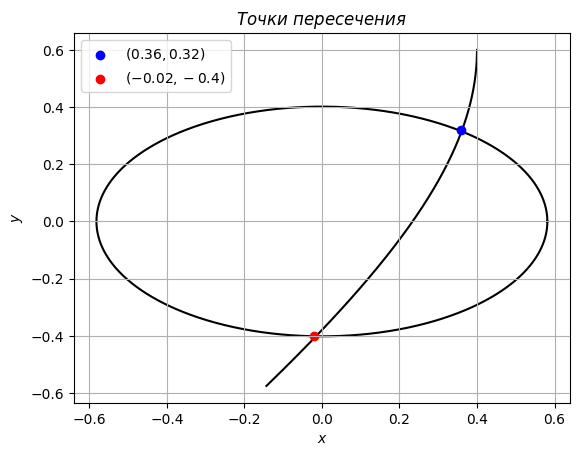

In [24]:
plt.plot(*curve1(), "k-", zorder=0)
plt.plot(*curve2(), "k-", zorder=0)
plt.scatter(0.36, 0.32, c="b", marker="o", label="$(0.36, 0.32)$")
plt.scatter(-0.02, -0.4, c="r", marker="o", label="$(-0.02, -0.4)$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$Точки ~пересечения$")
plt.legend()
plt.show()